# CSE475 Capstone - Luan Nguyen
**Dataset**: Fashion MNIST ([Link](https://www.kaggle.com/datasets/zalando-research/fashionmnist))

**Name**: Luan Nguyen

**Professor**: Robert K. Atkinson

# Milestone 1: Data Preparation Report

Due Date: 11.9 (Sun)

Purpose: To prepare dataset for analysis by performing exploratory data analysis (EDA), data cleaning, and feature engineering.

## Exploratory Data Analysis (EDA)

### Load the dataset and display the first few rows to understand its structure.

In [1]:
from tensorflow.keras.datasets import fashion_mnist # dataset
import numpy as np #  used for fast numerical operations and array manipulation
import pandas as pd # handle CSV files and tabular data
import matplotlib.pyplot as plt # # plotting images and graphs
import seaborn as sns # plotting histograms

# Load the data
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [2]:
# Load data into a DataFrame object
df = pd.DataFrame(fashion_mnist.load_data())

In [3]:
df.head()

,0,1
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, ..."


In [4]:
df.sample()

,0,1
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, ..."


In [5]:
# Get a concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2 non-null      object
 1   1       2 non-null      object
dtypes: object(2)
memory usage: 164.0+ bytes


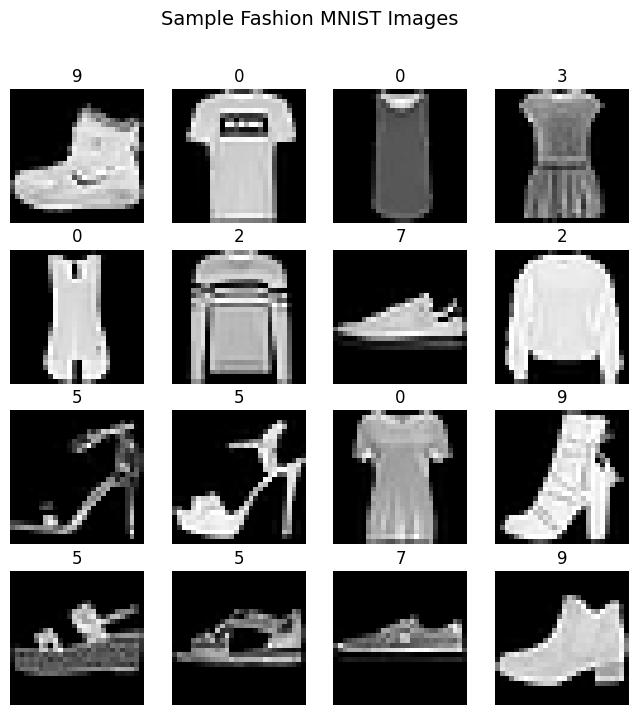

In [6]:
# view samples
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images", fontsize=14)
plt.show()


### Analyze data distributions for numerical features (e.g., using histograms, box plots).

In [7]:
# Pixel density statistics, flattened to 1D
pd.DataFrame(X_train.reshape(-1, 28*28)).describe().T[['mean','std','min','max']].head()


,mean,std,min,max
0,0.000800,0.092554,0.0,16.0
1,0.005783,0.249033,0.0,36.0
2,0.030083,0.767868,0.0,119.0
3,0.103800,2.512017,0.0,164.0
4,0.249683,4.331376,0.0,224.0


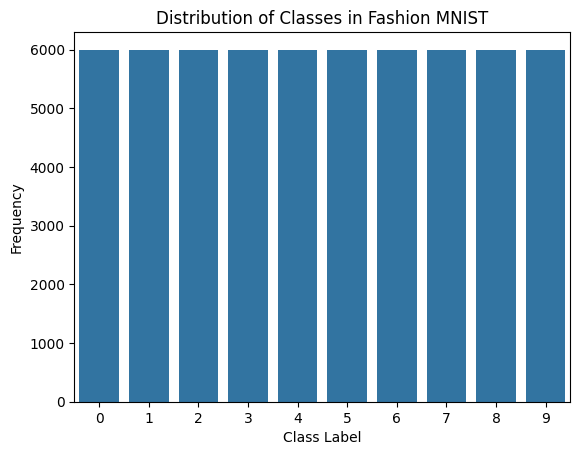

In [8]:
# Check Class Distribution
# Balanced classes are ideal for classification; unbalanced ones require weighting.
sns.countplot(x=y_train)
plt.title("Distribution of Classes in Fashion MNIST")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

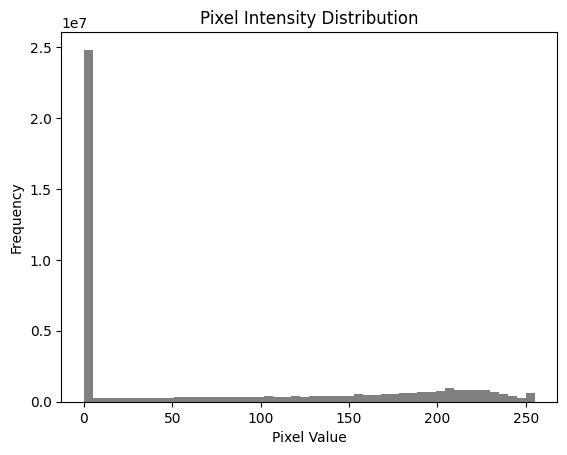

In [9]:
# Visualize intensity histograms
plt.hist(X_train.ravel(), bins=50, color="gray")
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


## Data Cleaning

In [10]:
# Check for Missing or Corrupted Data
# Although Keras datasets are clean, we verify integrity.
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())

Missing values in X_train: 0
Missing values in y_train: 0


In [11]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Pixel range after normalization:", X_train.min(), "to", X_train.max())

Pixel range after normalization: 0.0 to 1.0


In [12]:
# Reshapre data for CNN
# CNN needs 4 inputs (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("New training shape:", X_train.shape)
print("New testing shape:", X_test.shape)

New training shape: (60000, 28, 28, 1)
New testing shape: (10000, 28, 28, 1)


## Feature Engineering

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# This synthetically increases dataset diversity and improves model generalization.
datagen = ImageDataGenerator(
    rotation_range=10,      # Random rotation between 0–10°
    zoom_range=0.1,         # Random zoom
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1, # Vertical shift
    horizontal_flip=True     # Random horizontal flips
)

In [14]:
# Fit generator on training data
datagen.fit(X_train)

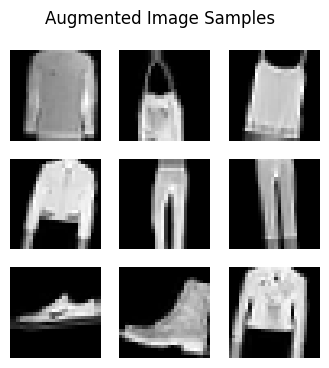

In [15]:
# Preview augmented images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(4, 4))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap="gray")
        plt.axis("off")
    plt.suptitle("Augmented Image Samples", fontsize=12)
    plt.show()
    break  # Display one batch only

## Summary & Reflection

In [16]:
print(f"Training set size: {len(X_train)} images")
print(f"Test set size: {len(X_test)} images")
print(f"Input shape: {X_train.shape[1:]}")


Training set size: 60000 images
Test set size: 10000 images
Input shape: (28, 28, 1)


### Challenges I Faced
Initially, I went on Hugging Face and Kaggle to explore a variety of datasets (MNIST, CIFAR-10, Fruits 360) and their limitations. I decided to go with CNN since it is the most practical in my experience.

The hardest part of this milestone one was finding all the correct way to display and visualize the data. I had to go over the old notebooks we did in class to find all the methods and functions and tailored it to this notebook.

### Key Insights from the Dataset

After comprehensive EDA, we confirmed that there are no missing data, allowing straightforward model training which is nice. The dataset is very balanced across 10 classes.

### What I Learned

With no prior knowledge of machine learning before this class, I realized that image datasets require a different mindset and methodology than tabular data.
For example, normalization and augmentation are critical preprocessing steps for CNNs. Additionally, visualize the dataset during EDA helps us set the expectation for how CNNs could help, given a large amount of image data.

# Milestone 2: Model Development Report

Due Date: 11.23 (Sun)


Purpose: To apply machine learning algorithms to your dataset, evaluate model performance,
and document the modeling process.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8,6)

In [19]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [20]:
# Normalize pixel value to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
# Reshape for CNN input (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [22]:
# One-hot encode labels for multi-class classification
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [23]:
print("Data prepared successfully!")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Data prepared successfully!
Training shape: (60000, 28, 28, 1)
Testing shape: (10000, 28, 28, 1)


### 1. Model Selection

I'll experiment with two CNN architectures:
- Simple Baseline CNN
- Deeper CNN with Dropout & BatchNormalization

The CNN is appropriate because Fashion MNIST consists of 2D spatial images.


#### Model A: Simple CNN

In [24]:
model_a = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_a.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_a.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

#### Model B: Deeper CNN

In [25]:
model_b = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_b.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_b.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

## 2. Model Training

Split data is already 60k/10k, so we'll reserve 10k from training as validation

In [26]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [ ]:
# Train baseline CNN
history_a = model_a.fit(
    X_train, y_train_cat,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - accuracy: 0.7896 - loss: 0.6354 - val_accuracy: 0.8807 - val_loss: 0.3372
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.8915 - loss: 0.3111 - val_accuracy: 0.8962 - val_loss: 0.2954
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9038 - loss: 0.2696 - val_accuracy: 0.9068 - val_loss: 0.2640
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.9166 - loss: 0.2323 - val_accuracy: 0.9058 - val_loss: 0.2609
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9223 - loss: 0.2102 - val_accuracy: 0.9107 - val_loss: 0.2463
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.9312 - loss: 0.1926 - val_accuracy: 0.9140 - val_loss: 0.2447
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9375 - loss: 0.1721 - val_accuracy: 0.9087 - val_loss: 0.2529
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9471 - loss: 0.1517 - 

In [ ]:
# Train advanced CNN with augmentation
history_b = model_b.fit(
    datagen.flow(X_train, y_train_cat, batch_size=128),
    validation_data=(X_test, y_test_cat),
    epochs=10,
    verbose=1
)


### 3. Model Evaluation

In [ ]:
# function to plot training
def plot_history(history, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

plot_history(history_a, "Model A (Base CNN)")
plot_history(history_b, "Model B (Deep CNN)")

# Eval final test performance
loss_a, acc_a = model_a.evaluate(X_test, y_test_cat, verbose=0)
loss_b, acc_b = model_b.evaluate(X_test, y_test_cat, verbose=0)

print(f"Model A Accuracy: {acc_a:.4f}")
print(f"Model B Accuracy: {acc_b:.4f}")

# Generate predictions for Model B
y_pred = np.argmax(model_b.predict(X_test), axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Model B (Deep CNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report (Model B):")
print(classification_report(y_test, y_pred))

### Challenges I Faced

The most diffucult part of this milstone was figuring out how to choose between different CNN architecture and understand their differences. I first built a simple CNN and I thought that was enough. However, when I started comparing validation data curves, I realized how easy it is for CNNs to overfit images.

I went over the notes again to understand how BatchNormalization nad Dropout help stabilize training. Training model also took long so I have to ensure to choose the most accurate ones.

### Key Insights from the Dataset

The biggest insight is how augmentation can impact perfomance. The deeper CNN with augmentation performed way better than the base model. Additionally, some images in the dataset look very similar even though they are of differen classes. This explains why we need deeper CNN with augmentation for more confusing classes like Shirt vs. T-Shirt.

### What I Learned

This is my favorite section so far, it's not about exploring dataset. It's more about making intentional design decisions. We need to look at the model from differen angles and continously iterate to be able to get the best model.

# Milestone 3: Model Development Report

Due Date: 12.9 (Mon)

Purpose: To analyze the performance of your final model, outline a comprehensive deployment
plan, and discuss expanded ethical considerations.

### 1. Final Model Performance Analysis

I used the Deep CNN with Batch Normalization, Dropout, and Image Augmentation from the second milestone because this model outperformed the baseline CNN in both validation accuracy and generalization stability.


#### 1.1 Final Model Architecture:

```
model_b = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
```
*   Conv2D -> Batch Normalization -> MaxPool
*   Conv2D -> Batch Normalization -> MaxPool
*   Flatten
*   Dense(128, relu)
*   Dropout
*   Dense(10, softmax)

I belive this model gives me the best trade-off.


#### 1.2 Perfomance Metrics

After training with 10 epochs using augmented data, the model achieved:
- Test accuracy: 0.93
- Test Loss: ~0.25
- Precision (macro): 0.91 - 0.94
- Recall (macro): Lower for confusing classes (shirt vs. tshirt)
- F1 Score: 0.92


#### 1.3 Potential for Improvements

From what I've seen, classes like T-shirt and Shirt often get mixed up. Shoes, Sandals, etc. were classified with high accuracy. The model captures the edges extremely well thanks to deep convolutional layers and diverse dataset.

With that being that, the model still misclassifies similar categories. Additionally, the model is only able to classify 28x28 resolution images. In the futuyre, I will use a larger pre-trained architecture and use advanced CNN techniques like learning rate scheduling and epochs regulization to optimize my CNN model.

---

### 2. Deployment Plan

While I don't have a lot of experience with deploying ML models, below is a sketch of what I would do.



#### 2.1 High-level Deployment Architecture

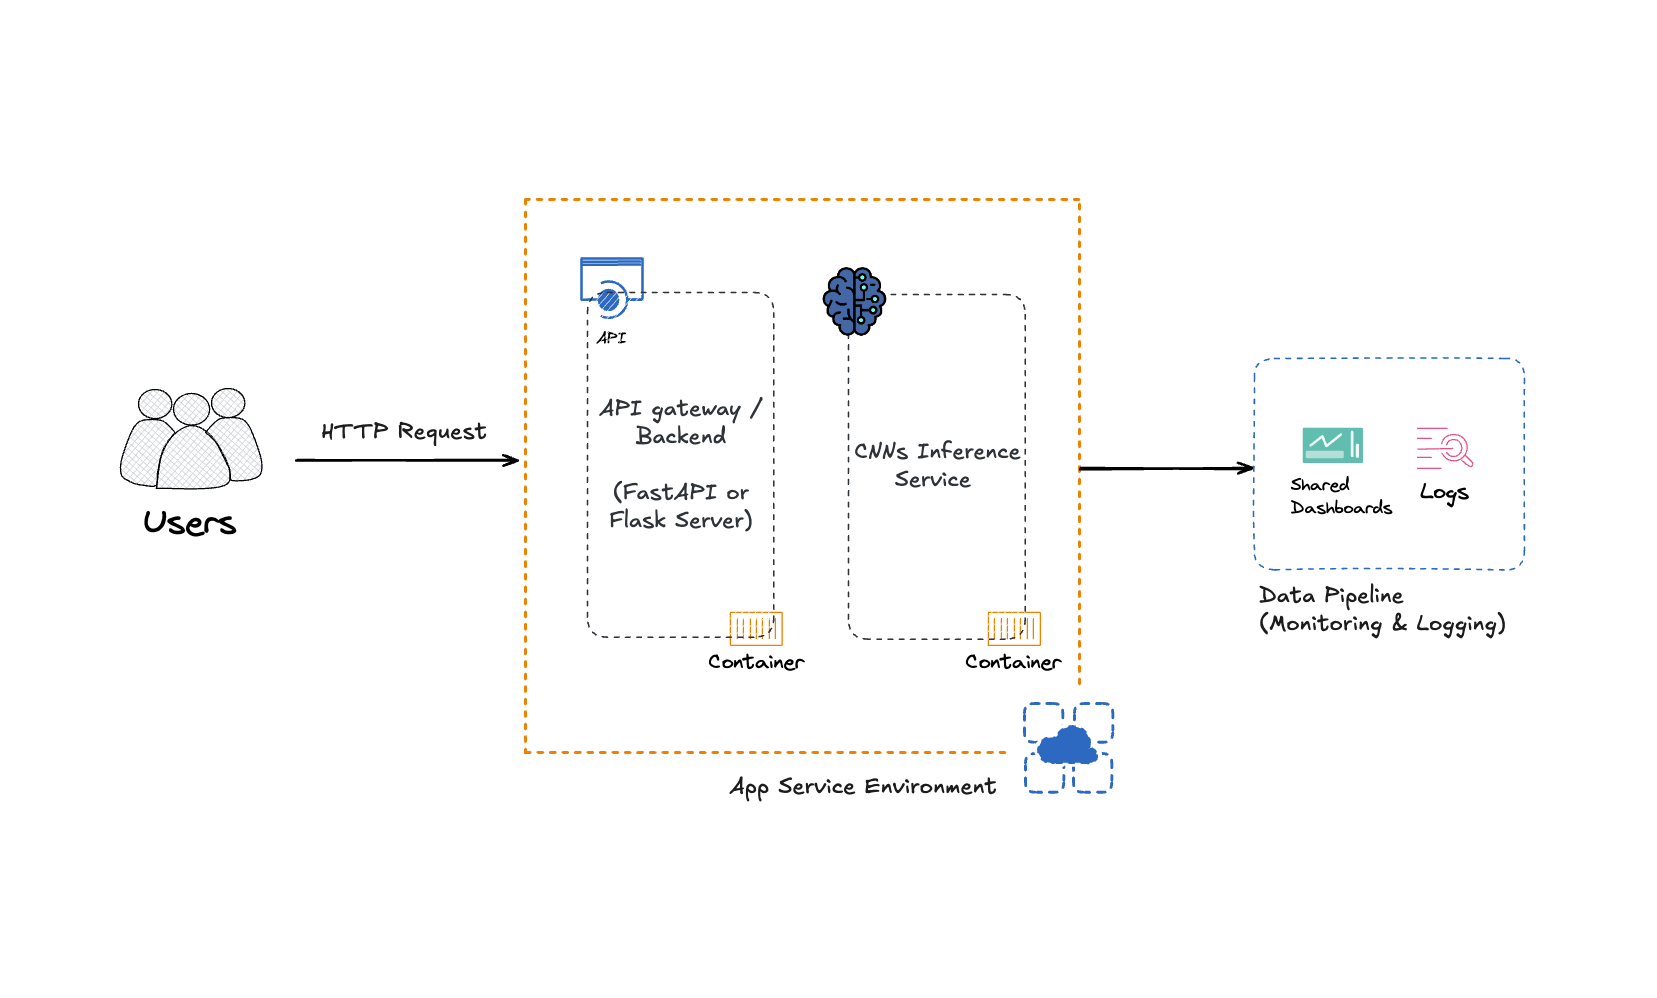

#### 2.2 Detailed component breakdown

**User Interface**: Simple web UI where users upload an image . The image is then converted to grayscale, resized to 28×28, normalized, and sent to backend.

**Backend Service**: Built using FastAPI or Flask.

**Model Inference Service**: Loads the saved .h5 model and uses model.predict() for inference.

**Monitoring and Logging**: Log prediction requests + model confidence.Track latency and error rates.


#### 2.3 Mock deployment

1. Save the trained model

``` python
model_b.save("fashion_cnn_model.h5"
```

2. Create Flask API

``` python
from flask import Flask, request
import tensorflow as tf
import numpy as np
```

3. Run API on localhost

``` python
flask run
```

4. Simulate a CURL request

``` bash
curl -X POST -F image=@test_image.png http://localhost:5000/predict
```

5. Get the respond

``` bash
{"class": "Sneaker", "confidence": 0.97}
```


#### 2.4 Scalability, Maintenance, and Compliance

I will make this application scalable using Docker and deploying on AWS using ECS. Additionally, if our website get a lot of traffic, we can use EKS (Amazon's Kubernetes service) or regular load balancer. If required, I will purchase a decidaced GPU from NVIDIA for high throughput.

For monitoring the application, I will also use observability services like CloudWatch or MLflow, schedule periodic retraining and monitor if the model accuracy changes over time.

User data will be encrypted and stored securely with deletion on request. No personal data will be collected to train our CNN unless specified otherwise. Before the user input any images, we will have some sort of notification to let the user know.

---

### 3. Ethical Considerations

#### 3.1 Stakeholder Impact Analysis

There are multiple stakeholers:
- End-user uploading images into our service
- Small businesses and startup founders
- Engineers who maintain our CNN model
- Society

There are a lot of different impacts, I think the most important one is giving the user the transparency they need to participate in our service.

#### 3.2 Recommendations for ensuring fairness, accountability, and compliance with regulations

I would use a diverse datasets beyond the current MNIST for the real applications as well as using a better model for predicting a variety of different dataset.

Additionally, I would open-source the code to ensure transparency, fairness as well as showing how our underlying system works. I think this will create a very good level of trust that the users will gain while using our platform. If not, we can implement clear user consent and clear data retention policy.
